<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-notebooks/python4QM_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Python for Quantum Mechanics

## **1. Gaussian distributions:**

Consider the Gaussian distribution:

$\rho(x) = A\,e^{−\lambda\,(x−a)^2}$

where: $A = \sqrt{\frac{\lambda}{\pi}}$, $a$, $\lambda$ are positive real constants.

Sketch $\rho(x)$ versus $x$ for different values of $A$, $a$ and $\lambda$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### 1st Way:

In [15]:
# Using the def/return statements
# Don't use lambda as a variable (lambda is reserved for lambda function in python)
def rho_x(l, a, x):
  """
  (Docstring -> Information)
  This function computes a Gaussian in 1D.
  """
  # Wave function
  pdf_x = np.sqrt(l/np.pi)*(np.exp(-l*(x-a)**2))

  # Return statement
  return pdf_x

In [17]:
help(rho_x)

Help on function rho_x in module __main__:

rho_x(l, a, x)
    (Docstring -> Information)
    This function computes a Gaussian in 1D.



In [18]:
# Create an axis
x = np.linspace(-10., +10., 1000)

# Safe check
#print(x.shape)

In [19]:
# Call our function
l_1 = 1.
a_1 = 0.8

l_2 = 0.5
a_2 = 1.5

l_3 = 2.
a_3 = -1.2

# Y axis
y_1 = rho_x(l_1, a_1, x)
y_2 = rho_x(l_2, a_2, x)
y_3 = rho_x(l_3, a_3, x)

#print(y_1.shape)

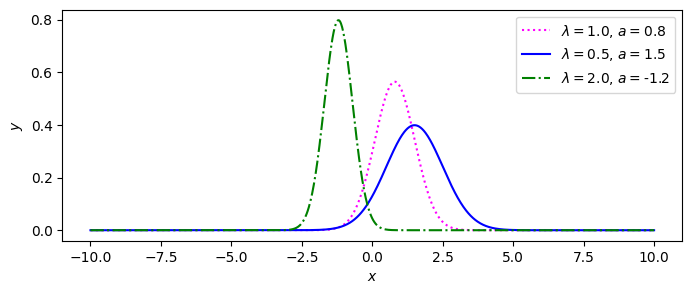

In [20]:
# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1, color = "magenta", linestyle = ":", label = rf"$\lambda =${l_1}, $a =${a_1}")

plt.plot(x, y_2, color = "blue", linestyle = "-", label = rf"$\lambda =${l_2}, $a =${a_2}")

plt.plot(x, y_3, color = "green", linestyle = "-.", label = rf"$\lambda =${l_3}, $a =${a_3}")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()

plt.show()

### 2nd Way:

In [21]:
# Lambda function
pdf_x2 = lambda l, a, x: np.sqrt(l/np.pi)*(np.exp(-l*(x-a)**2))

In [22]:
l_4 = 0.2
a_4 = -5.0

In [23]:
y_4 = pdf_x2(l_4, a_4, x)

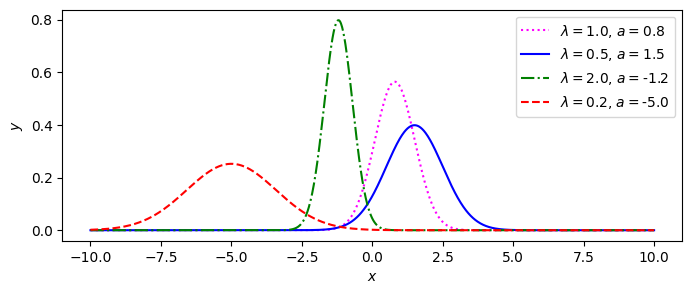

In [24]:
# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1, color = "magenta", linestyle = ":", label = rf"$\lambda =${l_1}, $a =${a_1}")

plt.plot(x, y_2, color = "blue", linestyle = "-", label = rf"$\lambda =${l_2}, $a =${a_2}")

plt.plot(x, y_3, color = "green", linestyle = "-.", label = rf"$\lambda =${l_3}, $a =${a_3}")

plt.plot(x, y_4, color = "red", linestyle = "--", label = rf"$\lambda =${l_4}, $a =${a_4}")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()

plt.show()

## **2. Time-dependent Wavefunction:**

Consider the wave function (Problem 1.5 in Griffiths):

$\Psi(x,t) = A\,e^{-\lambda|\,x|}\,e^{-i\omega t}$

### Domain 1: $x\geq0$

$\Psi_1(x,t) = A\,e^{-\lambda\,x}\,e^{-i\omega t}$

### Domain 2: $x<0$

$\Psi_2(x,t) = A\,e^{\lambda\,x}\,e^{-i\omega t}$

where $A=\sqrt{\lambda}$, $\lambda$, and $\omega$ are positive real constants.

Sketch $|\Psi|^2$ versus $x$ for $\lambda$ different values, and different times.

In [95]:
# Define the function

def psi_xt(l, w, x, t):
  """
  This function returns a piece-wise function in x with the absolute value.
  """

  y_psi = np.sqrt(l)*np.exp(-l*np.abs(x)*np.cos(w*t)) # Just the real part

  return y_psi


In [96]:
# Define an x vector
x = np.linspace(-10., +10., 1000)

# Fix the parameters
l_1 = 1.
w_1 = 1.

l_2 = 0.5
w_2 = 2.0

# Time
t = 0.

# Call the function
y_1 = psi_xt(l_1, w_1, x, t)
y_2 = psi_xt(l_2, w_2, x, t)

## Plot of the Wavefunction

$$\Psi(x,t)$$

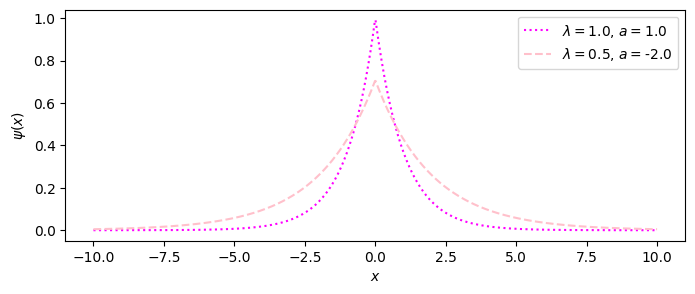

In [97]:
# Make a figure

# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1, color = "magenta", linestyle = ":", label = rf"$\lambda =${l_1}, $a =${a_1}")
plt.plot(x, y_2, color = "pink", linestyle = "--", label = rf"$\lambda =${l_2}, $a =${a_2}")

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")

plt.legend()

plt.show()

## Plot of the PDF

$$|\Psi(x,t)|^2$$

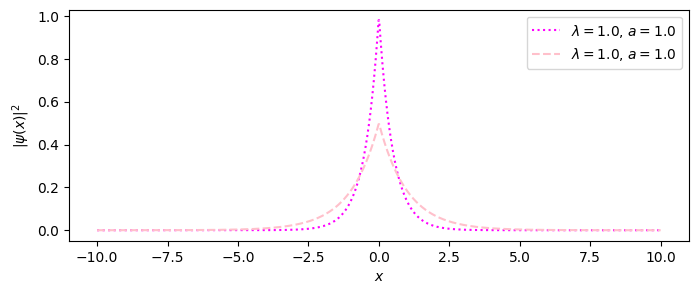

In [98]:
# Make a figure

# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1**2, color = "magenta", linestyle = ":", label = rf"$\lambda =${l_1}, $a =${a_1}")
plt.plot(x, y_2**2, color = "pink", linestyle = "--", label = rf"$\lambda =${l_1}, $a =${a_1}")

plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi(x)|^2$")

plt.legend()

plt.show()

## Time evolution of the wave function

In [101]:
# Time vector:
t_vector = np.linspace(0., np.pi/4, 10)

# Empty lists
y_vector = []

# For loop
for j in range(len(t_vector)):
  y_vector.append(psi_xt(l_1, w_1, x, t_vector[j]))

# Convert the list to array
y_array = np.array(y_vector)

print(y_array.shape)


(10, 1000)


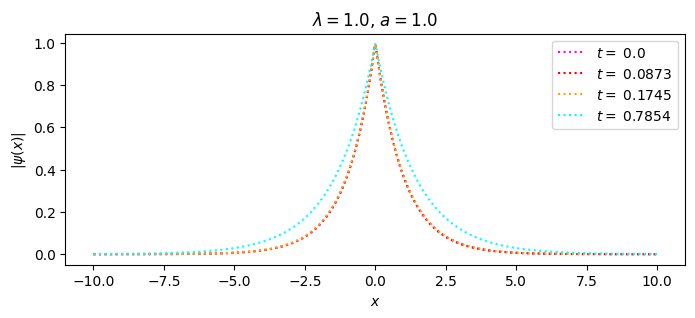

In [102]:
# Make a figure

# Make a figure
plt.figure(figsize=(8,3))

plt.title(rf"$\lambda =${l_1}, $a =${a_1}")
plt.plot(x, y_array[0,:], color = "magenta", linestyle = ":", label = rf"$t=$ {round(t_vector[0],4)}")
plt.plot(x, y_array[1,:], color = "red", linestyle = ":", label = rf"$t=$ {round(t_vector[1],4)}")
plt.plot(x, y_array[2,:], color = "orange", linestyle = ":", label = rf"$t=$ {round(t_vector[2], 4)}")
plt.plot(x, y_array[9,:], color = "cyan", linestyle = ":", label = rf"$t=$ {round(t_vector[9], 4)}")

plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi(x)|$")

plt.legend()

plt.show()

### Save figure:

In [103]:
# Import drive

from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
%cd /content/drive/MyDrive/QM_Folder

/content/drive/MyDrive/QM_Folder


In [70]:
!pwd

/content/drive/MyDrive/QM_Folder


In [67]:
#!ls -ltr QM_Folder/

In [71]:
# For Loop

for j in range(len(t_vector)):
  # Make a figure
  plt.figure(figsize=(8,3))

  plt.title(rf"$\lambda =${l_1}, $a =${a_1}")
  plt.plot(x, y_array[j,:], color = "magenta", linestyle = ":", label = rf"$t=$ {round(t_vector[j],4)}")

  plt.xlabel(r"$x$")
  plt.ylabel(r"$|\psi(x)|$")

  plt.legend()

  plt.savefig("abswf_{:02d}.png".format(j))

  plt.close()

### Animation:

In [72]:

# Import libraries for animation

import glob

from PIL import Image

from IPython import display

In [73]:

# Perform the animation

# Define inputs/outputs
img_input  = "./abswf**.png"
gif_output = "./abs_animation.gif"

# Collect the images
imgs = (Image.open(f) for f in sorted(glob.glob(img_input)))
img  = next(imgs)

# Export the GIF animation
img.save(fp = gif_output, format = "GIF", append_images = imgs)

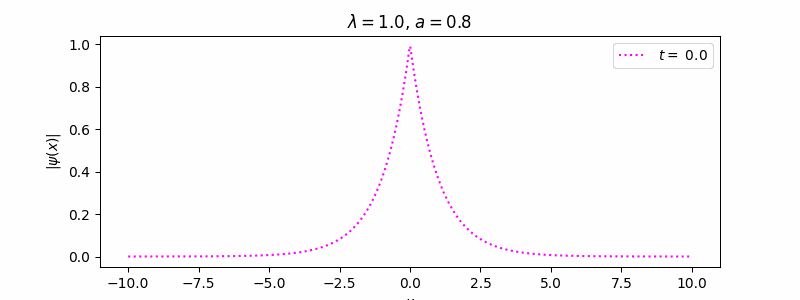

In [76]:
# Display GIFs
display.Image(open("./abs_animation.gif", "rb").read())

## **3. Piece-wise Wavefunctions:**

Sketch the following $\Psi(x)$ at $t=0$ (Problem 1.4 in Griffiths):

$$\Psi(x,0)=\left\{
\begin{array}{ll}
      A(x/a) & 0 \leq x \leq a \\
      A(b-x)/(b-a) & a \leq x \leq b \\
      0 & \rm otherwise \\
\end{array}
\right. $$




In [77]:
# Define piece-wise function

def wave_piecewise(x, a, b, A):
  """
  Function that returns piece-wise values for psi(x,0)
  """
  # Use conditionals
  if (0. <= x <= a):
    return A*(x/a)
  elif (a <= x <= b):
    return A*(b-x)/(b-a)
  else:
    return 0.

In [90]:
# Define an x axis
x = np.arange(-3., 6., 0.01)

# Define input parameters
a_1, b_1, A_1 = 1., 2., 3.

a_2, b_2, A_2 = -2., 3.5, 2.5

# The usual of evaluating functions
#y = wave_piecewise(x, a_1, b_1, A_1) # WRONG

# CORRECT: Using empty lists
y_1 = []
y_2 = []

for i in range(len(x)):
  y_1.append(wave_piecewise(x[i], a_1, b_1, A_1))
  y_2.append(wave_piecewise(x[i], a_2, b_2, A_2))

# Convert to array
y_1 = np.array(y_1)
y_2 = np.array(y_2)

print(x.shape, y_1.shape)

(900,) (900,)


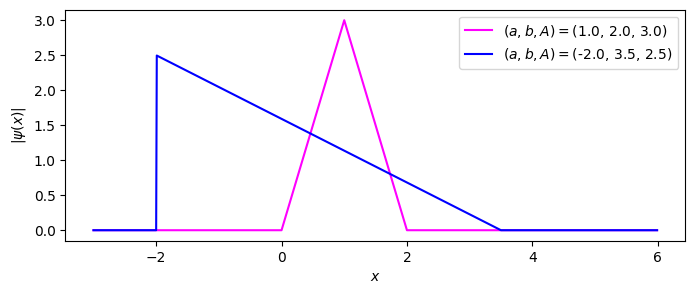

In [91]:
# Make a figure

# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1, color = "magenta", linestyle = "-", label = rf"$(a,b,A)=${a_1, b_1, A_1}")
plt.plot(x, y_2, color = "blue", linestyle = "-", label = rf"$(a,b,A)=${a_2, b_2, A_2}")


plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi(x)|$")

plt.legend()

plt.show()

### PDFs:

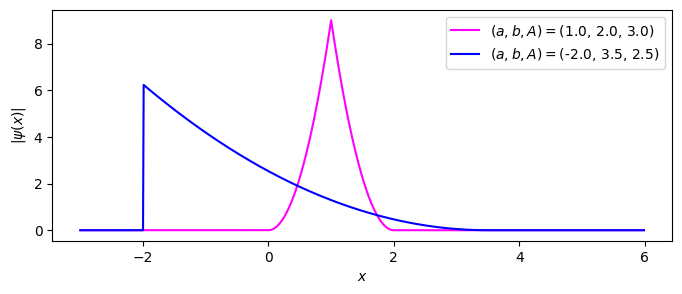

In [92]:
# Make a figure

# Make a figure
plt.figure(figsize=(8,3))

plt.plot(x, y_1**2, color = "magenta", linestyle = "-", label = rf"$(a,b,A)=${a_1, b_1, A_1}")
plt.plot(x, y_2**2, color = "blue", linestyle = "-", label = rf"$(a,b,A)=${a_2, b_2, A_2}")


plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi(x)|$")

plt.legend()

plt.show()

## **4. 1D Gaussian wavepacket**

$$\psi(x) = A\,e^{-\frac{x^2}{2\sigma^2}}\sin(kx)$$

In [105]:
# Define a function for the wavepacket
def wave_packet(x, A, s, k):
  """
  Function to create Gaussian-like wavepackets:
  """
  # Mathematical Function
  psi_x = A*np.exp(-x**2/(2*s**2))*np.sin(k*x)

  return psi_x

In [113]:
# Vector for x
x = np.linspace(-20., +20., 10000)

# Fix Parameters
A, s, k = 1., 2., 3*np.pi

# Get the Y vector
y = wave_packet(x, A, s, k)

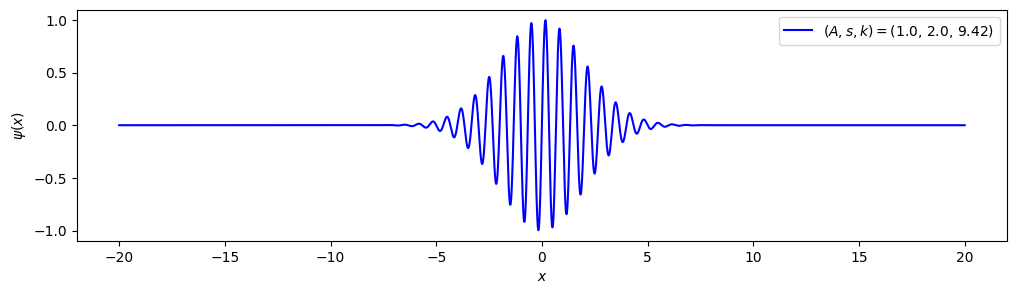

In [114]:
# Make a figure
plt.figure(figsize=(12,3))

plt.plot(x, y, color = "blue", linestyle = "-", label = rf"$(A, s, k)=${A, s, round(k,2)}")

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")

plt.legend()

plt.show()

### PDF:

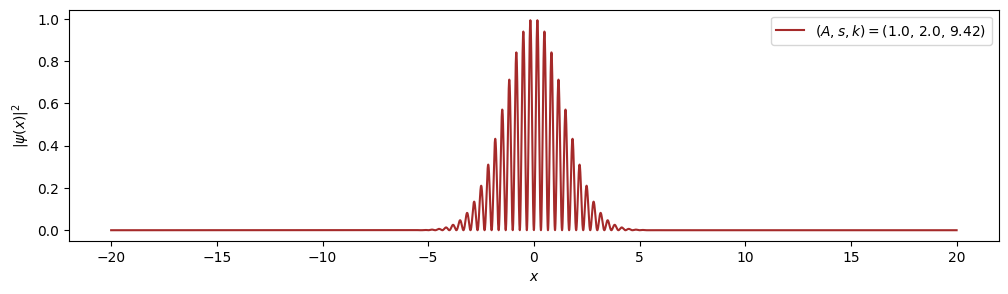

In [116]:
# Make a figure
plt.figure(figsize=(12,3))

plt.plot(x, y**2, color = "brown", linestyle = "-", label = rf"$(A, s, k)=${A, s, round(k,2)}")

plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi(x)|^2$")

plt.legend()

plt.show()

### Moving wave packet:

$$\psi(x,t) = A\,e^{-\frac{(x - vt)^2}{2\sigma^2}}\sin(kx - \omega t)$$

In [117]:
# Function for the time dependent wave packet
def wave_packet_t(x, t, A, s, k, w):
  """
  Function to create time dependent Gaussian-like wavepackets:
  """
  # Mathematical Function
  psi_x = A*np.exp(-(x-t)**2/(2*s**2))*np.sin(k*x-w*t)

  return psi_x

In [125]:
# Define the parameters
w = 3*np.pi

# Time vector
t_vector = np.linspace(0., 10., 50)

# Evaluate at a time
y_0 =  wave_packet_t(x, t_vector[0], A, s, k, w)

y_2 =  wave_packet_t(x, t_vector[20], A, s, k, w)

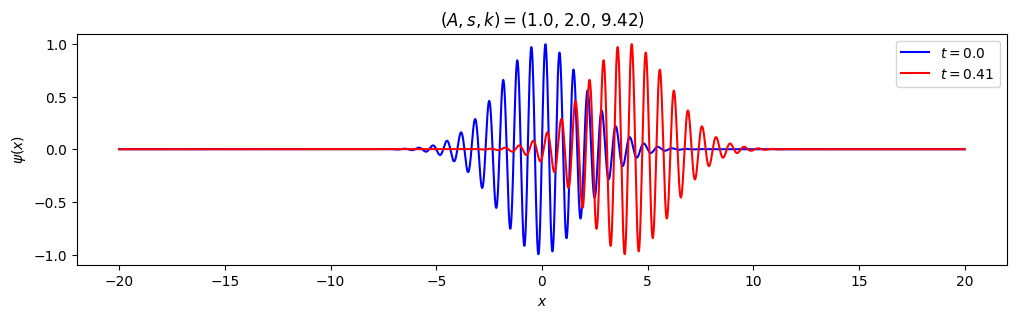

In [126]:
# Make a figure
plt.figure(figsize=(12,3))

plt.title(rf"$(A, s, k)=${A, s, round(k,2)}")
plt.plot(x, y_0, color = "blue", linestyle = "-", label = rf"$t=${round(t_vector[0],2)}")
plt.plot(x, y_2, color = "red", linestyle = "-", label = rf"$t=${round(t_vector[2],2)}")

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")

plt.legend()

plt.show()

### Animating our wave packet:

In [127]:
# Images at every time

for j in range(len(t_vector)):
  # Make a figure
  plt.figure(figsize=(12,3))

  plt.title(rf"$(A, s, k)=${A, s, round(k,2)}")
  plt.plot(x, wave_packet_t(x, t_vector[j], A, s, k, w), color = "blue", linestyle = "-", label = rf"$t=${round(t_vector[j],2)}")

  plt.xlabel(r"$x$")
  plt.ylabel(r"$\psi(x)$")

  plt.legend()

  plt.savefig("gaussian_wp_{:02d}.png".format(j))

  plt.close()

In [128]:
# Perform the animation

# Define inputs/outputs
img_input  = "./gaussian_wp**.png"
gif_output = "./gaussian_wp_animation.gif"

# Collect the images
imgs = (Image.open(f) for f in sorted(glob.glob(img_input)))
img  = next(imgs)

# Export the GIF animation
img.save(fp = gif_output, format = "GIF", append_images = imgs)

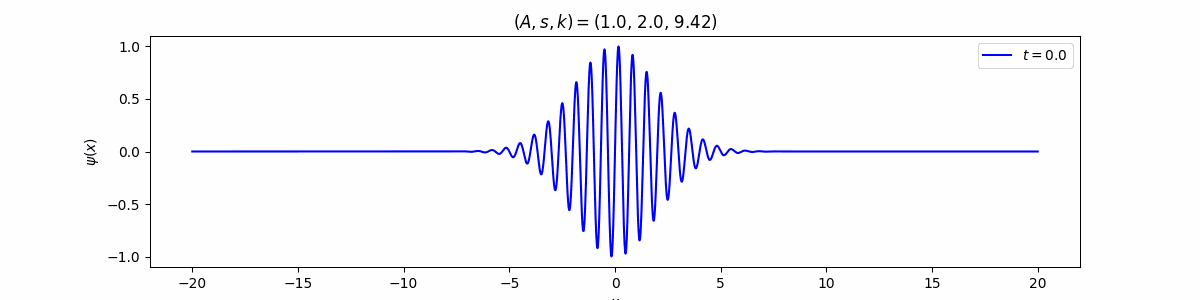

In [130]:
# Display GIFs
display.Image(open("./gaussian_wp_animation.gif", "rb").read())

## **5. 2D Gaussian function**

$$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y} \exp\left(-\left(\frac{(x - x_0)^2}{2\sigma_X^2} + \frac{(y - y_0)^2}{2\sigma_Y^2} \right)\right).$$

## PDF plot:

In [131]:
# Define a function

def gaussian_2d(x_2d, y_2d):
  """
  This is a function to evaluate a 2D Gaussian.
  Inputs: x_2d, y_2d -> coordinate matrices from the mesh
  Output: g_2d -> 2D Gaussian
  """

  g_2d = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x_2d**2/(2*sigma_x**2) + y_2d**2/(2*sigma_y**2))))

  return g_2d

In [132]:
# Define the input parameters
sigma_x = sigma_y = 2.

# 1D vectors for x and y
x = np.linspace(-10., 10., 1000)
y = np.linspace(-10., 10., 1000)

# 2D mesh grid
x_2d, y_2d = np.meshgrid(x, y)

# Evaluate the Gaussian

z_2d = gaussian_2d(x_2d, y_2d)

print(x_2d.shape, y_2d.shape, z_2d.shape)

(1000, 1000) (1000, 1000) (1000, 1000)


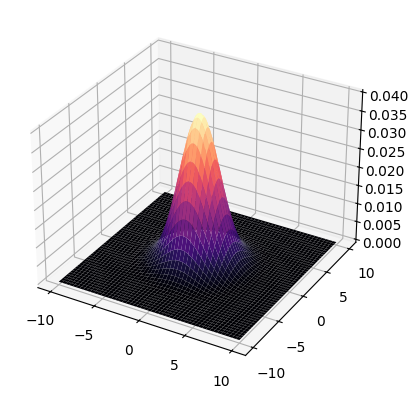

In [133]:
# 3D plotting

plt.figure()

ax = plt.axes(projection ="3d")

ax.plot_surface(x_2d, y_2d, z_2d, cmap = "magma")

plt.show()

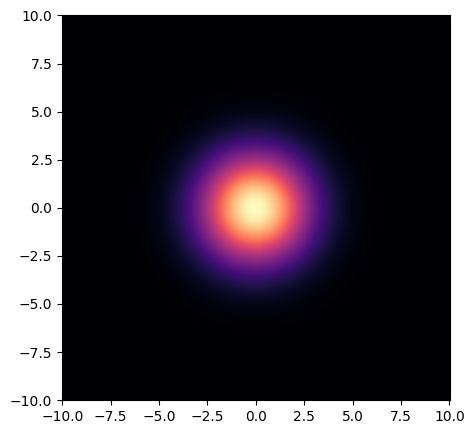

In [135]:
plt.figure(figsize=(5,5))

plt.pcolor(x_2d, y_2d, z_2d, cmap = "magma")

plt.show()

$$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y} \exp\left(-\left(\frac{(x - x_0)^2}{2\sigma_X^2} + \frac{(y - y_0)^2}{2\sigma_Y^2} \right)\right).\cos(kx)\cos(ky)$$

In [137]:
# Define a function

def gaussian_2d(x_2d, y_2d):
  """
  This is a function to evaluate a 2D Gaussian.
  Inputs: x_2d, y_2d -> coordinate matrices from the mesh
  Output: g_2d -> 2D Gaussian
  """

  g_2d = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x_2d**2/(2*sigma_x**2) + y_2d**2/(2*sigma_y**2))))*np.cos(2*np.pi*x_2d)*np.cos(2*np.pi*y_2d)

  return g_2d

In [138]:
# Evaluate the Gaussian

z_2d = gaussian_2d(x_2d, y_2d)

print(x_2d.shape, y_2d.shape, z_2d.shape)

(1000, 1000) (1000, 1000) (1000, 1000)


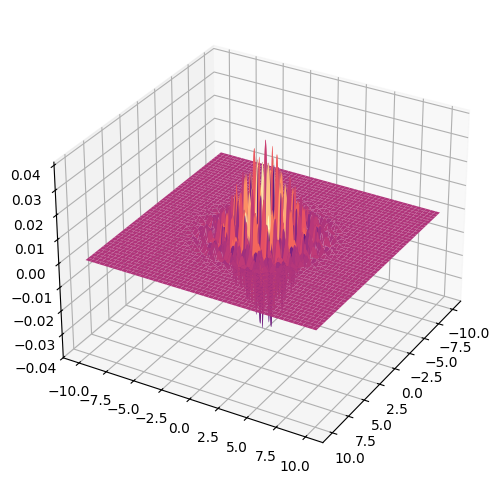

In [141]:
# 3D plotting

plt.figure(figsize=(8,6))

ax = plt.axes(projection ="3d")

ax.plot_surface(x_2d, y_2d, z_2d, cmap = "magma")

ax.view_init(30, 30)

plt.show()

## PDF plot:

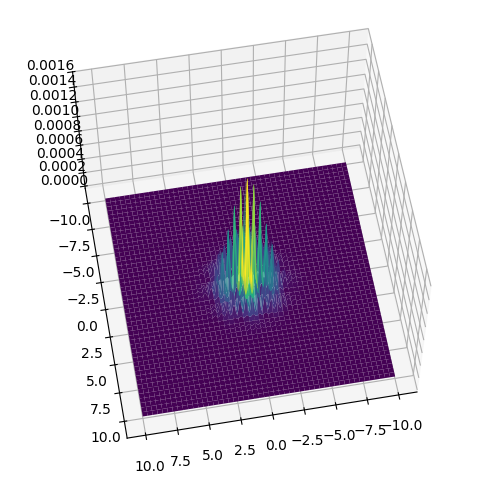

In [145]:
# 3D plotting

plt.figure(figsize=(8,6))

ax = plt.axes(projection ="3d")

ax.plot_surface(x_2d, y_2d, abs(z_2d)**2, cmap = "viridis")

ax.view_init(60, 80)

plt.show()

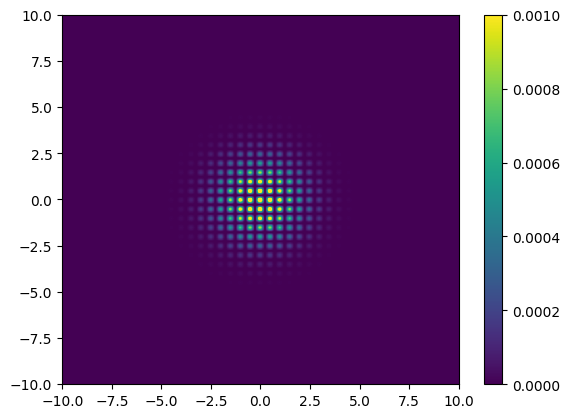

In [146]:
# 3D plotting

plt.figure()

z = plt.pcolor(x_2d, y_2d, abs(z_2d)**2, cmap = "viridis", clim = (0,0.001))

plt.colorbar(z)

plt.show()